# Flat10 runs with FaIR v2.1.3
#### originally from: https://github.com/chrisroadmap/flat10/blob/90db2ea64377a6da45ae374e57829223576e1ac9/notebooks/flat10.ipynb#L50
#### modified by gems

In [1]:
import os
# import fair
from src import fair
from fair import FAIR
from fair.interface import fill, initialise
from fair.io import read_properties
import numpy as np
# import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import pandas as pd
import pooch
import seaborn as sns
from tqdm.auto import tqdm
import xarray as xr

In [3]:
FAIR?

In [2]:
fair.__version__

'2.1.3'

In [3]:
f = FAIR()
f.define_time(0, 320, 1)

In [4]:
scenarios = ['esm-flat10', 'esm-flat10_zec', 'esm-flat10_cdr']
f.define_scenarios(scenarios)

In [5]:
cal_1_2_0_file = pooch.retrieve(
    url = "https://zenodo.org/records/8399112/files/calibrated_constrained_parameters.csv",
    known_hash = "md5:de3b83432b9d071efdd1427ad31e9076"
)

In [6]:
cal_1_2_0_df = pd.read_csv(cal_1_2_0_file, index_col=0)
cal_1_2_0_df

,clim_gamma,clim_c1,clim_c2,clim_c3,clim_kappa1,clim_kappa2,clim_kappa3,clim_epsilon,clim_sigma_eta,clim_sigma_xi,...,fscale_Stratospheric water vapour,fscale_Land use,fscale_Volcanic,fscale_solar_amplitude,fscale_solar_trend,fscale_Light absorbing particles on snow and ice,fscale_Contrails,fscale_CO2,cc_co2_concentration_1750,seed
1230,1.769676,3.624462,7.990559,351.593545,1.428812,3.185628,0.492204,0.387406,0.494609,0.619379,...,1.510615,0.786075,0.937678,0.460204,-0.016256,1.686514,1.405533,0.987613,277.625450,1846533
1715,2.143142,4.889789,21.813475,101.917617,1.970173,1.071125,1.328655,1.465390,0.394019,0.367552,...,0.876840,1.188071,1.038958,0.343548,-0.056502,1.043790,0.703501,0.968117,279.909140,2040048
2658,4.177349,5.204886,20.998936,21.085816,0.797920,2.526630,1.000076,1.251896,0.653188,0.547847,...,0.383282,0.914854,0.744196,0.458884,-0.002800,0.544324,0.820430,1.011921,276.858025,2416305
3898,2.044461,4.592895,14.656268,15.303202,0.620333,2.832756,1.154977,2.160007,0.461311,0.260020,...,1.631921,0.881545,1.073446,1.016936,-0.010243,1.276720,0.724910,0.948908,278.869631,2911065
5915,4.812140,4.582716,9.051207,160.760900,0.944823,1.820105,1.024776,1.131748,0.324605,0.425571,...,0.763970,0.908647,1.014453,0.713096,0.010865,1.916141,0.810404,0.963535,278.236615,3715848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494559,8.403735,3.684395,7.857839,59.593912,0.970143,3.116633,0.823952,1.193423,1.085473,0.498466,...,2.571393,0.591452,0.980190,0.789364,-0.061004,1.805852,2.130288,0.963828,278.458458,597684804
1495435,8.417904,4.145310,18.338430,85.349717,1.112525,2.308416,0.826365,0.732074,1.391199,0.652156,...,0.686941,1.161403,1.035643,0.465030,0.059482,2.504425,0.806118,0.943120,278.689557,598034328
1497041,9.569664,4.199879,10.691504,22.224111,1.179793,2.213022,1.168574,1.351311,0.975174,0.336736,...,0.691395,1.571854,1.028524,1.547694,-0.022602,1.037537,0.628377,0.946479,276.880991,598675122
1497105,5.212261,3.095057,8.814387,160.337839,1.408057,2.235378,0.807895,1.061619,0.507567,0.321235,...,-0.105670,0.767821,0.803652,1.379710,-0.063397,3.134901,1.105478,1.013445,277.914780,598700658


In [7]:
f.define_configs(list(cal_1_2_0_df.index))

In [8]:
species = ['CO2', 'CH4', 'N2O']
properties = {
    "CO2": {
        'type': 'co2',
        'input_mode': 'emissions',
        'greenhouse_gas': True,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False
    },
    "CH4": {
        'type': 'ch4',
        'input_mode': 'emissions',
        'greenhouse_gas': True,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False
    },
    "N2O": {
        'type': 'n2o',
        'input_mode': 'emissions',
        'greenhouse_gas': True,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False
    }
}

In [9]:
# declare species and properties
f.define_species(species, properties)

In [10]:
f.allocate()

In [11]:
# fill emissions: zero for non-CO2
f.emissions.loc[dict(specie="CH4")] = 0
f.emissions.loc[dict(specie="N2O")] = 0

In [12]:
# constant pre-industrial concentration for non-CO2 GHGs
f.concentration.loc[dict(specie='CH4')] = 808.2490285
f.concentration.loc[dict(specie='N2O')] = 273.021047

In [14]:
np.linspace(9.9, -9.9, 100)  # 100 timepoints, from years 100.5 to 199.5 inclusive

array([ 9.9,  9.7,  9.5,  9.3,  9.1,  8.9,  8.7,  8.5,  8.3,  8.1,  7.9,
        7.7,  7.5,  7.3,  7.1,  6.9,  6.7,  6.5,  6.3,  6.1,  5.9,  5.7,
        5.5,  5.3,  5.1,  4.9,  4.7,  4.5,  4.3,  4.1,  3.9,  3.7,  3.5,
        3.3,  3.1,  2.9,  2.7,  2.5,  2.3,  2.1,  1.9,  1.7,  1.5,  1.3,
        1.1,  0.9,  0.7,  0.5,  0.3,  0.1, -0.1, -0.3, -0.5, -0.7, -0.9,
       -1.1, -1.3, -1.5, -1.7, -1.9, -2.1, -2.3, -2.5, -2.7, -2.9, -3.1,
       -3.3, -3.5, -3.7, -3.9, -4.1, -4.3, -4.5, -4.7, -4.9, -5.1, -5.3,
       -5.5, -5.7, -5.9, -6.1, -6.3, -6.5, -6.7, -6.9, -7.1, -7.3, -7.5,
       -7.7, -7.9, -8.1, -8.3, -8.5, -8.7, -8.9, -9.1, -9.3, -9.5, -9.7,
       -9.9])

In [15]:
# fill emissions of CO2 for each scenario
f.emissions.loc[dict(specie="CO2", scenario="esm-flat10")] = 10 * 44.009 / 12.011
f.emissions.loc[dict(specie="CO2", scenario="esm-flat10_zec", timepoints=np.arange(0.5, 100))] = 10 * 44.009 / 12.011
f.emissions.loc[dict(specie="CO2", scenario="esm-flat10_zec", timepoints=np.arange(100.5, 320))] = 0
f.emissions.loc[dict(specie="CO2", scenario="esm-flat10_cdr", timepoints=np.arange(0.5, 100))] = 10 * 44.009 / 12.011
f.emissions.loc[dict(specie="CO2", scenario="esm-flat10_cdr", timepoints=np.arange(100.5, 200))] = np.linspace(9.9, -9.9, 100)[:, None] * 44.009 / 12.011
f.emissions.loc[dict(specie="CO2", scenario="esm-flat10_cdr", timepoints=np.arange(200.5, 300))] = -10 * 44.009 / 12.011
f.emissions.loc[dict(specie="CO2", scenario="esm-flat10_cdr", timepoints=np.arange(300.5, 320))] = 0

In [16]:
# Get default species configs
f.fill_species_configs()

# Climate response
fill(f.climate_configs['ocean_heat_capacity'], cal_1_2_0_df.loc[:,'clim_c1':'clim_c3'])
fill(f.climate_configs['ocean_heat_transfer'], cal_1_2_0_df.loc[:,'clim_kappa1':'clim_kappa3'])
fill(f.climate_configs['deep_ocean_efficacy'], cal_1_2_0_df.loc[:,'clim_epsilon'])
fill(f.climate_configs['gamma_autocorrelation'], cal_1_2_0_df.loc[:,'clim_gamma'])
fill(f.climate_configs['stochastic_run'], False)

# carbon cycle
fill(f.species_configs['iirf_0'], cal_1_2_0_df.loc[:, 'cc_r0'].values.squeeze(), specie='CO2')
fill(f.species_configs['iirf_airborne'], cal_1_2_0_df.loc[:, 'cc_rA'].values.squeeze(), specie='CO2')
fill(f.species_configs['iirf_uptake'], cal_1_2_0_df.loc[:, 'cc_rU'].values.squeeze(), specie='CO2')
fill(f.species_configs['iirf_temperature'], cal_1_2_0_df.loc[:, 'cc_rT'].values.squeeze(), specie='CO2')

# Scale CO2 forcing based on its 4xCO2 calibration
fill(f.species_configs["forcing_scale"], cal_1_2_0_df["fscale_CO2"].values.squeeze(), specie='CO2')

# initial condition of CO2 concentration (but not baseline for forcing calculations)
fill(f.species_configs['baseline_concentration'], 284.3169988, specie='CO2')
fill(f.species_configs['baseline_concentration'], 808.2490285, specie='CH4')
fill(f.species_configs['baseline_concentration'], 273.021047, specie='N2O')

In [17]:
f.species_configs

<xarray.Dataset>
Dimensions:                                   (config: 1001, specie: 3,
                                               gasbox: 4)
Coordinates:
  * config                                    (config) int64 1230 ... 1498424
  * specie                                    (specie) <U3 'CO2' 'CH4' 'N2O'
  * gasbox                                    (gasbox) int64 0 1 2 3
Data variables: (12/31)
    tropospheric_adjustment                   (config, specie) float64 0.05 ....
    forcing_efficacy                          (config, specie) float64 1.0 .....
    forcing_temperature_feedback              (config, specie) float64 0.0 .....
    forcing_scale                             (config, specie) float64 0.9876...
    partition_fraction                        (config, specie, gasbox) float64 ...
    unperturbed_lifetime                      (config, specie, gasbox) float64 ...
    ...                                        ...
    aci_shape                                 (config, specie) float64 0.0 .....
    cl_atoms                                  (specie) float64 0.0 0.0 0.0
    br_atoms                                  (specie) float64 0.0 0.0 0.0
    fractional_release                        (config, specie) float64 0.0 .....
    ch4_lifetime_chemical_sensitivity         (config, specie) float64 0.0 .....
    lifetime_temperature_sensitivity          (config) float64 -0.0408 ... -0...

In [13]:
# set initial conditions
initialise(f.concentration, f.species_configs['baseline_concentration'])
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.airborne_emissions, 0)
initialise(f.cumulative_emissions, 0)

In [14]:
import copy
import os
import warnings

import numpy as np
import pandas as pd
import pooch
import xarray as xr
from scipy.interpolate import interp1d
from tqdm.auto import tqdm



In [20]:
from fair.constants import SPECIES_AXIS, TIME_AXIS
from fair.earth_params import (
    earth_radius,
    mass_atmosphere,
    molecular_weight_air,
    seconds_per_year,
)
from fair.energy_balance_model import (
    calculate_toa_imbalance_postrun,
    multi_ebm,
    step_temperature,
)

In [25]:
calculate_toa_imbalance_postrun?

In [15]:
from fair.constants import SPECIES_AXIS, TIME_AXIS
from fair.earth_params import (
    earth_radius,
    mass_atmosphere,
    molecular_weight_air,
    seconds_per_year,
)
from fair.energy_balance_model import (
    calculate_toa_imbalance_postrun,
    multi_ebm,
    step_temperature,
)
from fair.forcing.aerosol.erfaci import logsum
from fair.forcing.aerosol.erfari import calculate_erfari_forcing
from fair.forcing.ghg import etminan2016, leach2021ghg, meinshausen2020, myhre1998
from fair.forcing.minor import calculate_linear_forcing
from fair.forcing.ozone import thornhill2021
from fair.gas_cycle import calculate_alpha
from fair.gas_cycle.ch4_lifetime import calculate_alpha_ch4
from fair.gas_cycle.eesc import calculate_eesc
from fair.gas_cycle.forward import step_concentration, step_concentration_gems
from fair.gas_cycle.inverse import unstep_concentration
from fair.interface import fill
from fair.structure.species import multiple_allowed, species_types, valid_input_modes
from fair.structure.units import (
    compound_convert,
    desired_concentration_units,
    desired_emissions_units,
    mixing_ratio_convert,
    prefix_convert,
    time_convert,
)

# HERE = os.path.dirname(os.path.realpath(__file__))
# DEFAULT_SPECIES_CONFIG_FILE = os.path.join(
#     HERE, "defaults", "data", "ar6", "species_configs_properties.csv"
# )

ImportError: cannot import name 'step_concentration_gems' from 'fair.gas_cycle.forward' (/Users/gshum/anaconda3/lib/python3.10/site-packages/fair/gas_cycle/forward.py)

In [23]:
ls ../src/fair/

__init__.py              earth_params.py          gas_cycle/
__pycache__/             energy_balance_model.py  interface.py
_version.py              exceptions.py            io.py
constants.py             fair.py                  structure/
defaults/                forcing/


In [32]:
def run_gems(self, progress=True, suppress_warnings=True):
        """Run the FaIR model.

        Parameters
        ----------
        progress : bool
            Display progress bar.
        suppress_warnings : bool
            Hide warnings relating to covariance in energy balance matrix.
        """
        self._check_properties()
        self._make_indices()
        if self._routine_flags["temperature"]:
            with warnings.catch_warnings():
                if suppress_warnings:
                    warnings.filterwarnings(
                        "ignore",
                        category=RuntimeWarning,
                        module="scipy.stats._multivariate",
                    )
                self._make_ebms()

        # part of pre-run: TODO move to a new method
        if (
            self._co2_indices.sum()
            + self._co2_ffi_indices.sum()
            + self._co2_afolu_indices.sum()
            == 3
        ):
            self.emissions[..., self._co2_indices] = (
                self.emissions[..., self._co2_ffi_indices].data
                + self.emissions[..., self._co2_afolu_indices].data
            )
        self.cumulative_emissions[1:, ...] = (
            self.emissions.cumsum(dim="timepoints", skipna=False) * self.timestep
            + self.cumulative_emissions[0, ...]
        ).data

        # create numpy arrays
        alpha_lifetime_array = self.alpha_lifetime.data
        airborne_emissions_array = self.airborne_emissions.data
        baseline_concentration_array = self.species_configs[
            "baseline_concentration"
        ].data
        baseline_emissions_array = self.species_configs["baseline_emissions"].data
        br_atoms_array = self.species_configs["br_atoms"].data
        ch4_lifetime_chemical_sensitivity_array = self.species_configs[
            "ch4_lifetime_chemical_sensitivity"
        ].data
        lifetime_temperature_sensitivity_array = self.species_configs[
            "lifetime_temperature_sensitivity"
        ].data
        cl_atoms_array = self.species_configs["cl_atoms"].data
        concentration_array = self.concentration.data
        concentration_per_emission_array = self.species_configs[
            "concentration_per_emission"
        ].data
        contrails_radiative_efficiency_array = self.species_configs[
            "contrails_radiative_efficiency"
        ].data
        cummins_state_array = (
            np.ones(
                (
                    self._n_timebounds,
                    self._n_scenarios,
                    self._n_configs,
                    self._n_layers + 1,
                )
            )
            * np.nan
        )
        cumulative_emissions_array = self.cumulative_emissions.data
        deep_ocean_efficacy_array = self.climate_configs["deep_ocean_efficacy"].data
        emissions_array = self.emissions.data
        erfari_radiative_efficiency_array = self.species_configs[
            "erfari_radiative_efficiency"
        ].data
        erfaci_scale_array = self.species_configs["aci_scale"].data
        erfaci_shape_array = self.species_configs["aci_shape"].data
        forcing_array = self.forcing.data
        forcing_scale_array = self.species_configs["forcing_scale"].data * (
            1 + self.species_configs["tropospheric_adjustment"].data
        )
        forcing_efficacy_array = self.species_configs["forcing_efficacy"].data
        forcing_efficacy_sum_array = (
            np.ones((self._n_timebounds, self._n_scenarios, self._n_configs)) * np.nan
        )
        forcing_reference_concentration_array = self.species_configs[
            "forcing_reference_concentration"
        ].data
        forcing_sum_array = self.forcing_sum.data
        forcing_temperature_feedback_array = self.species_configs[
            "forcing_temperature_feedback"
        ].data
        fractional_release_array = self.species_configs["fractional_release"].data
        g0_array = self.species_configs["g0"].data
        g1_array = self.species_configs["g1"].data
        gas_partitions_array = self.gas_partitions.data
        greenhouse_gas_radiative_efficiency_array = self.species_configs[
            "greenhouse_gas_radiative_efficiency"
        ].data
        h2o_stratospheric_factor_array = self.species_configs[
            "h2o_stratospheric_factor"
        ].data
        iirf_0_array = self.species_configs["iirf_0"].data
        iirf_airborne_array = self.species_configs["iirf_airborne"].data
        iirf_temperature_array = self.species_configs["iirf_temperature"].data
        iirf_uptake_array = self.species_configs["iirf_uptake"].data
        land_use_cumulative_emissions_to_forcing_array = self.species_configs[
            "land_use_cumulative_emissions_to_forcing"
        ].data
        lapsi_radiative_efficiency_array = self.species_configs[
            "lapsi_radiative_efficiency"
        ].data
        ocean_heat_transfer_array = self.climate_configs["ocean_heat_transfer"].data
        ozone_radiative_efficiency_array = self.species_configs[
            "ozone_radiative_efficiency"
        ].data
        partition_fraction_array = self.species_configs["partition_fraction"].data
        unperturbed_lifetime_array = self.species_configs["unperturbed_lifetime"].data

        if self._routine_flags["temperature"]:
            eb_matrix_d_array = self.ebms["eb_matrix_d"].data
            forcing_vector_d_array = self.ebms["forcing_vector_d"].data
            stochastic_d_array = self.ebms["stochastic_d"].data

        # forcing should be initialised so this should not be nan. We could check, or
        # allow silent fail as some species don't take forcings and would correctly be
        # nan.
        forcing_sum_array[0:1, ...] = np.nansum(
            forcing_array[0:1, ...], axis=SPECIES_AXIS
        )

        # this is the most important state vector
        cummins_state_array[0, ..., 0] = forcing_sum_array[0, ...]
        cummins_state_array[..., 1:] = self.temperature.data

        # non-linear forcing relationships need an offset. To save calculating
        # them every timestep, we'll pre-determine the forcing to use as the
        # baseline values.
        # GHGs forcing under Meinshausen2020
        # This check, and others, need to come earlier.
        if self._routine_flags["ghg"] and self.ghg_method == "meinshausen2020":
            if (
                np.sum(
                    np.isnan(
                        forcing_reference_concentration_array[:, self._ghg_indices]
                    )
                )
                > 0
            ):
                raise ValueError(
                    "There are NaNs in "
                    "FAIR.species_configs['forcing_reference_concentration'] which "
                    "means that I can't calculate greenhouse gas forcing."
                )

            # Allow for a user-specified offset (provided through self). This will allow
            # different baseline and pre-industrial concentrations, for example if we
            # want to include natural emissions in CH4. In this case
            # baseline_concentration is zero, but the offset should be w.r.t initial
            # (usually pre-industrial) concentration.
            if not hasattr(self, "ghg_forcing_offset"):
                self.ghg_forcing_offset = meinshausen2020(
                    baseline_concentration_array[None, None, ...],
                    forcing_reference_concentration_array[None, None, ...],
                    forcing_scale_array[None, None, ...],
                    greenhouse_gas_radiative_efficiency_array[None, None, ...],
                    self._co2_indices,
                    self._ch4_indices,
                    self._n2o_indices,
                    self._minor_ghg_indices,
                )

        # Do we also need to check Leach2021 and ozone forcing?

        # it's all been leading up to this : FaIR MAIN LOOP
        for i_timepoint in tqdm(
            range(self._n_timepoints),
            disable=1 - progress,
            desc=f"Running {self._n_scenarios*self._n_configs} projections in parallel",
            unit="timesteps",
        ):
            if self._routine_flags["ghg"]:
                # 1. alpha scaling
                alpha_lifetime_array[
                    i_timepoint : i_timepoint + 1, ..., self._ghg_indices
                ] = calculate_alpha(  # this timepoint
                    airborne_emissions_array[
                        i_timepoint : i_timepoint + 1, ..., self._ghg_indices
                    ],  # last timebound
                    cumulative_emissions_array[
                        i_timepoint : i_timepoint + 1, ..., self._ghg_indices
                    ],  # last timebound
                    g0_array[None, None, ..., self._ghg_indices],
                    g1_array[None, None, ..., self._ghg_indices],
                    iirf_0_array[None, None, ..., self._ghg_indices],
                    iirf_airborne_array[None, None, ..., self._ghg_indices],
                    iirf_temperature_array[None, None, ..., self._ghg_indices],
                    iirf_uptake_array[None, None, ..., self._ghg_indices],
                    cummins_state_array[i_timepoint : i_timepoint + 1, ..., 1:2],
                    self.iirf_max,
                )

                # 2. multi-species methane lifetime if desired; update GHG concentration
                # for CH4
                # needs previous timebound but this is no different to the generic
                if self.ch4_method == "thornhill2021":
                    alpha_lifetime_array[
                        i_timepoint : i_timepoint + 1, ..., self._ch4_indices
                    ] = calculate_alpha_ch4(
                        emissions_array[i_timepoint : i_timepoint + 1, ...],
                        concentration_array[i_timepoint : i_timepoint + 1, ...],
                        cummins_state_array[i_timepoint : i_timepoint + 1, ..., 1:2],
                        baseline_emissions_array[None, None, ...],
                        baseline_concentration_array[None, None, ...],
                        ch4_lifetime_chemical_sensitivity_array[None, None, ...],
                        lifetime_temperature_sensitivity_array[None, None, :, None],
                        self._aerosol_chemistry_from_emissions_indices,
                        self._aerosol_chemistry_from_concentration_indices,
                    )

                # 3. greenhouse emissions to concentrations; include methane from IIRF
                (
                    concentration_array[
                        i_timepoint + 1 : i_timepoint + 2,
                        ...,
                        self._ghg_forward_indices,
                    ],
                    gas_partitions_array[..., self._ghg_forward_indices, :],
                    airborne_emissions_array[
                        i_timepoint + 1 : i_timepoint + 2,
                        ...,
                        self._ghg_forward_indices,
                    ],
                ) = step_concentration_gems(
                    emissions_array[
                        i_timepoint : i_timepoint + 1,
                        ...,
                        self._ghg_forward_indices,
                        None,
                    ],  # this timepoint
                    gas_partitions_array[
                        ..., self._ghg_forward_indices, :
                    ],  # last timebound
                    airborne_emissions_array[
                        i_timepoint + 1 : i_timepoint + 2,
                        ...,
                        self._ghg_forward_indices,
                        None,
                    ],  # last timebound
                    alpha_lifetime_array[
                        i_timepoint : i_timepoint + 1,
                        ...,
                        self._ghg_forward_indices,
                        None,
                    ],
                    baseline_concentration_array[
                        None, None, ..., self._ghg_forward_indices
                    ],
                    baseline_emissions_array[
                        None, None, ..., self._ghg_forward_indices, None
                    ],
                    concentration_per_emission_array[
                        None, None, ..., self._ghg_forward_indices
                    ],
                    unperturbed_lifetime_array[
                        None, None, ..., self._ghg_forward_indices, :
                    ],
                    #        oxidation_matrix,
                    partition_fraction_array[
                        None, None, ..., self._ghg_forward_indices, :
                    ],
                    self.timestep,
                )

                # 4. greenhouse gas concentrations to emissions
                (
                    emissions_array[
                        i_timepoint : i_timepoint + 1, ..., self._ghg_inverse_indices
                    ],
                    gas_partitions_array[..., self._ghg_inverse_indices, :],
                    airborne_emissions_array[
                        i_timepoint + 1 : i_timepoint + 2,
                        ...,
                        self._ghg_inverse_indices,
                    ],
                ) = unstep_concentration(
                    concentration_array[
                        i_timepoint + 1 : i_timepoint + 2,
                        ...,
                        self._ghg_inverse_indices,
                    ],  # this timepoint
                    gas_partitions_array[
                        None, ..., self._ghg_inverse_indices, :
                    ],  # last timebound
                    airborne_emissions_array[
                        i_timepoint : i_timepoint + 1,
                        ...,
                        self._ghg_inverse_indices,
                        None,
                    ],  # last timebound
                    alpha_lifetime_array[
                        i_timepoint : i_timepoint + 1,
                        ...,
                        self._ghg_inverse_indices,
                        None,
                    ],
                    baseline_concentration_array[
                        None, None, ..., self._ghg_inverse_indices
                    ],
                    baseline_emissions_array[
                        None, None, ..., self._ghg_inverse_indices
                    ],
                    concentration_per_emission_array[
                        None, None, ..., self._ghg_inverse_indices
                    ],
                    unperturbed_lifetime_array[
                        None, None, ..., self._ghg_inverse_indices, :
                    ],
                    #        oxidation_matrix,
                    partition_fraction_array[
                        None, None, ..., self._ghg_inverse_indices, :
                    ],
                    self.timestep,
                )
                cumulative_emissions_array[
                    i_timepoint + 1, ..., self._ghg_inverse_indices
                ] = (
                    cumulative_emissions_array[
                        i_timepoint, ..., self._ghg_inverse_indices
                    ]
                    + emissions_array[i_timepoint, ..., self._ghg_inverse_indices]
                    * self.timestep
                )

                # 5. greenhouse gas concentrations to forcing
                if self.ghg_method == "leach2021":
                    forcing_array[
                        i_timepoint + 1 : i_timepoint + 2, ..., self._ghg_indices
                    ] = leach2021ghg(
                        concentration_array[i_timepoint + 1 : i_timepoint + 2, ...],
                        baseline_concentration_array[None, None, ...]
                        * np.ones(
                            (1, self._n_scenarios, self._n_configs, self._n_species)
                        ),
                        forcing_scale_array[None, None, ...],
                        greenhouse_gas_radiative_efficiency_array[None, None, ...],
                        self._co2_indices,
                        self._ch4_indices,
                        self._n2o_indices,
                        self._minor_ghg_indices,
                    )[
                        0:1, ..., self._ghg_indices
                    ]
                if self.ghg_method == "meinshausen2020":
                    forcing_array[
                        i_timepoint + 1 : i_timepoint + 2, ..., self._ghg_indices
                    ] = meinshausen2020(
                        concentration_array[i_timepoint + 1 : i_timepoint + 2, ...],
                        forcing_reference_concentration_array[None, None, ...]
                        * np.ones(
                            (1, self._n_scenarios, self._n_configs, self._n_species)
                        ),
                        forcing_scale_array[None, None, ...],
                        greenhouse_gas_radiative_efficiency_array[None, None, ...],
                        self._co2_indices,
                        self._ch4_indices,
                        self._n2o_indices,
                        self._minor_ghg_indices,
                    )[
                        0:1, ..., self._ghg_indices
                    ]
                    forcing_array[
                        i_timepoint + 1 : i_timepoint + 2, ..., self._ghg_indices
                    ] = (
                        forcing_array[
                            i_timepoint + 1 : i_timepoint + 2, ..., self._ghg_indices
                        ]
                        - self.ghg_forcing_offset[..., self._ghg_indices]
                    )
                elif self.ghg_method == "etminan2016":
                    forcing_array[
                        i_timepoint + 1 : i_timepoint + 2, ..., self._ghg_indices
                    ] = etminan2016(
                        concentration_array[i_timepoint + 1 : i_timepoint + 2, ...],
                        baseline_concentration_array[None, None, ...]
                        * np.ones(
                            (1, self._n_scenarios, self._n_configs, self._n_species)
                        ),
                        forcing_scale_array[None, None, ...],
                        greenhouse_gas_radiative_efficiency_array[None, None, ...],
                        self._co2_indices,
                        self._ch4_indices,
                        self._n2o_indices,
                        self._minor_ghg_indices,
                    )[
                        0:1, ..., self._ghg_indices
                    ]
                elif self.ghg_method == "myhre1998":
                    forcing_array[
                        i_timepoint + 1 : i_timepoint + 2, ..., self._ghg_indices
                    ] = myhre1998(
                        concentration_array[i_timepoint + 1 : i_timepoint + 2, ...],
                        baseline_concentration_array[None, None, ...]
                        * np.ones(
                            (1, self._n_scenarios, self._n_configs, self._n_species)
                        ),
                        forcing_scale_array[None, None, ...],
                        greenhouse_gas_radiative_efficiency_array[None, None, ...],
                        self._co2_indices,
                        self._ch4_indices,
                        self._n2o_indices,
                        self._minor_ghg_indices,
                    )[
                        0:1, ..., self._ghg_indices
                    ]

            # 6. aerosol direct forcing
            if self._routine_flags["ari"]:
                forcing_array[
                    i_timepoint + 1 : i_timepoint + 2, ..., self._ari_indices
                ] = calculate_erfari_forcing(
                    emissions_array[i_timepoint : i_timepoint + 1, ...],
                    concentration_array[i_timepoint + 1 : i_timepoint + 2, ...],
                    baseline_emissions_array[None, None, ...],
                    baseline_concentration_array[None, None, ...],
                    forcing_scale_array[None, None, ...],
                    erfari_radiative_efficiency_array[None, None, ...],
                    self._aerosol_chemistry_from_emissions_indices,
                    self._aerosol_chemistry_from_concentration_indices,
                )

            # 7. aerosol indirect forcing
            if self._routine_flags["aci"]:
                forcing_array[
                    i_timepoint + 1 : i_timepoint + 2, ..., self._aci_indices
                ] = logsum(
                    emissions_array[i_timepoint : i_timepoint + 1, ...],
                    concentration_array[i_timepoint + 1 : i_timepoint + 2, ...],
                    baseline_emissions_array[None, None, ...],
                    baseline_concentration_array[None, None, ...],
                    forcing_scale_array[None, None, ..., self._aci_indices],
                    erfaci_scale_array[None, None, :],
                    erfaci_shape_array[None, None, ...],
                    self._aerosol_chemistry_from_emissions_indices,
                    self._aerosol_chemistry_from_concentration_indices,
                )

            # 8. calculate EESC this timestep for ozone forcing (and use it for
            # methane lifetime in the following timestep)
            if self._routine_flags["eesc"]:
                concentration_array[
                    i_timepoint + 1 : i_timepoint + 2, ..., self._eesc_indices
                ] = calculate_eesc(
                    concentration_array[i_timepoint + 1 : i_timepoint + 2, ...],
                    fractional_release_array[None, None, ...],
                    cl_atoms_array[None, None, ...],
                    br_atoms_array[None, None, ...],
                    self._cfc11_indices,
                    self._halogen_indices,
                    self.br_cl_ods_potential,
                )

            # 9. ozone emissions & concentrations to forcing
            if self._routine_flags["ozone"]:
                forcing_array[
                    i_timepoint + 1 : i_timepoint + 2, ..., self._ozone_indices
                ] = thornhill2021(
                    emissions_array[i_timepoint : i_timepoint + 1, ...],
                    concentration_array[i_timepoint + 1 : i_timepoint + 2, ...],
                    baseline_emissions_array[None, None, ...],
                    baseline_concentration_array[None, None, ...],
                    forcing_scale_array[None, None, ..., self._ozone_indices],
                    ozone_radiative_efficiency_array[None, None, ...],
                    self._aerosol_chemistry_from_emissions_indices,
                    self._aerosol_chemistry_from_concentration_indices,
                )

            # 10. contrails forcing from NOx emissions
            if self._routine_flags["contrails"]:
                forcing_array[
                    i_timepoint + 1 : i_timepoint + 2, ..., self._contrails_indices
                ] = calculate_linear_forcing(
                    emissions_array[i_timepoint : i_timepoint + 1, ...],
                    0,
                    forcing_scale_array[None, None, ..., self._contrails_indices],
                    contrails_radiative_efficiency_array[None, None, ...],
                )

            # 11. LAPSI forcing from BC and OC emissions
            if self._routine_flags["lapsi"]:
                forcing_array[
                    i_timepoint + 1 : i_timepoint + 2, ..., self._lapsi_indices
                ] = calculate_linear_forcing(
                    emissions_array[i_timepoint : i_timepoint + 1, ...],
                    baseline_emissions_array[None, None, ...],
                    forcing_scale_array[None, None, ..., self._lapsi_indices],
                    lapsi_radiative_efficiency_array[None, None, ...],
                )

            # 12. CH4 forcing to stratospheric water vapour forcing
            if self._routine_flags["h2o stratospheric"]:
                forcing_array[
                    i_timepoint + 1 : i_timepoint + 2, ..., self._h2ostrat_indices
                ] = calculate_linear_forcing(
                    forcing_array[i_timepoint + 1 : i_timepoint + 2, ...],
                    0,
                    forcing_scale_array[None, None, ..., self._h2ostrat_indices],
                    h2o_stratospheric_factor_array[None, None, ...],
                )

            # 13. CO2 cumulative emissions to land use change forcing
            if self._routine_flags["land use"]:
                forcing_array[
                    i_timepoint + 1 : i_timepoint + 2, ..., self._landuse_indices
                ] = calculate_linear_forcing(
                    cumulative_emissions_array[i_timepoint + 1 : i_timepoint + 2, ...],
                    0,
                    forcing_scale_array[None, None, ..., self._landuse_indices],
                    land_use_cumulative_emissions_to_forcing_array[None, None, ...],
                )

            # 14. apply temperature-forcing feedback here.
            forcing_array[i_timepoint + 1 : i_timepoint + 2, ...] = (
                forcing_array[i_timepoint + 1 : i_timepoint + 2, ...]
                + cummins_state_array[i_timepoint : i_timepoint + 1, ..., 1:2]
                * forcing_temperature_feedback_array[None, None, ...]
            )

            # 15. sum forcings
            forcing_sum_array[i_timepoint + 1 : i_timepoint + 2, ...] = np.nansum(
                forcing_array[i_timepoint + 1 : i_timepoint + 2, ...], axis=SPECIES_AXIS
            )
            forcing_efficacy_sum_array[
                i_timepoint + 1 : i_timepoint + 2, ...
            ] = np.nansum(
                forcing_array[i_timepoint + 1 : i_timepoint + 2, ...]
                * forcing_efficacy_array[None, None, ...],
                axis=SPECIES_AXIS,
            )

            # 16. forcing to temperature
            if self._routine_flags["temperature"]:
                cummins_state_array[
                    i_timepoint + 1 : i_timepoint + 2, ...
                ] = step_temperature(
                    cummins_state_array[i_timepoint : i_timepoint + 1, ...],
                    eb_matrix_d_array[None, None, ...],
                    forcing_vector_d_array[None, None, ...],
                    stochastic_d_array[i_timepoint + 1 : i_timepoint + 2, None, ...],
                    forcing_efficacy_sum_array[
                        i_timepoint + 1 : i_timepoint + 2, ..., None
                    ],
                )

        # 17. TOA imbalance
        # forcing is not efficacy adjusted here, is this correct?
        toa_imbalance_array = calculate_toa_imbalance_postrun(
            cummins_state_array,
            forcing_sum_array,  # [..., None],
            ocean_heat_transfer_array,
            deep_ocean_efficacy_array,
        )

        # 18. Ocean heat content change
        # if a restart value is present, include it and subtract off the TOA
        # imbalance from the restart as this would be double counting
        # in non-restart runs, both OHC and N are zero in first timebound
        ocean_heat_content_change_array = self.ocean_heat_content_change[0:1, ...] + (
            (
                np.cumsum(toa_imbalance_array, axis=TIME_AXIS)
                - toa_imbalance_array[0:1, ...]
            )
            * self.timestep
            * earth_radius**2
            * 4
            * np.pi
            * seconds_per_year
        )

        # 19. calculate airborne fraction - we have NaNs and zeros we know about, and we
        # don't mind
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            airborne_fraction_array = (
                airborne_emissions_array / cumulative_emissions_array
            )

        # 20. (Re)allocate to xarray
        self.temperature.data = cummins_state_array[..., 1:]
        self.concentration.data = concentration_array
        self.emissions.data = emissions_array
        self.forcing.data = forcing_array
        self.forcing_sum.data = forcing_sum_array
        self.cumulative_emissions.data = cumulative_emissions_array
        self.airborne_emissions.data = airborne_emissions_array
        self.airborne_fraction.data = airborne_fraction_array
        self.gas_partitions.data = gas_partitions_array
        self.ocean_heat_content_change.data = ocean_heat_content_change_array
        self.toa_imbalance.data = toa_imbalance_array
        self.stochastic_forcing.data = cummins_state_array[..., 0]
        
        self.

In [33]:
run_gems(self = f)

Running 3003 projections in parallel:   0%|          | 0/320 [00:00<?, ?timesteps/s]

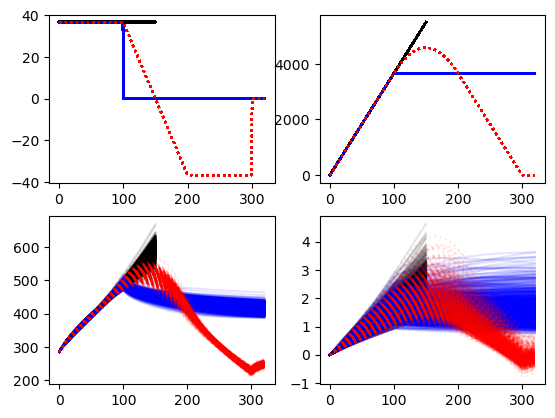

In [19]:
fig, ax = plt.subplots(2, 2)
ax[0,0].plot(f.timepoints[:150], f.emissions.loc[dict(specie="CO2", scenario="esm-flat10", timepoints=np.arange(0.5, 150))], color='k', alpha=0.1);
ax[0,0].plot(f.timepoints, f.emissions.loc[dict(specie="CO2", scenario="esm-flat10_zec")], color='b', alpha=0.1);
ax[0,0].plot(f.timepoints, f.emissions.loc[dict(specie="CO2", scenario="esm-flat10_cdr")], color='r', alpha=0.1, ls=':');
ax[0,1].plot(np.arange(0, 151), f.cumulative_emissions.loc[dict(specie="CO2", scenario="esm-flat10", timebounds=np.arange(0, 151))], color='k', alpha=0.1);
ax[0,1].plot(f.cumulative_emissions.loc[dict(specie="CO2", scenario="esm-flat10_zec")], color='b', alpha=0.1);
ax[0,1].plot(f.cumulative_emissions.loc[dict(specie="CO2", scenario="esm-flat10_cdr")], color='r', alpha=0.1, ls=':');
ax[1,0].plot(np.arange(0, 151), f.concentration.loc[dict(specie="CO2", scenario="esm-flat10", timebounds=np.arange(0, 151))], color='k', alpha=0.1);
ax[1,0].plot(f.concentration.loc[dict(specie="CO2", scenario="esm-flat10_zec")], color='b', alpha=0.1);
ax[1,0].plot(f.concentration.loc[dict(specie="CO2", scenario="esm-flat10_cdr")], color='r', alpha=0.1, ls=':');
ax[1,1].plot(np.arange(0, 151), f.temperature.loc[dict(layer=0, scenario="esm-flat10", timebounds=np.arange(0, 151))], color='k', alpha=0.1);
ax[1,1].plot(f.temperature.loc[dict(layer=0, scenario="esm-flat10_zec")], color='b', alpha=0.1);
ax[1,1].plot(f.temperature.loc[dict(layer=0, scenario="esm-flat10_cdr")], color='r', alpha=0.1, ls=':');

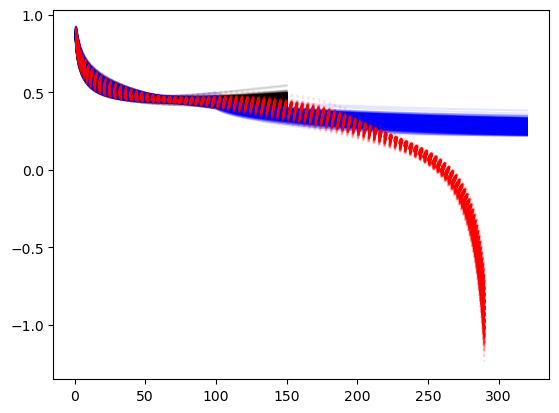

In [20]:
plt.plot(np.arange(0, 151), f.airborne_fraction.loc[dict(specie="CO2", scenario="esm-flat10", timebounds=np.arange(0, 151))], color='k', alpha=0.1);
plt.plot(f.airborne_fraction.loc[dict(specie="CO2", scenario="esm-flat10_zec")], color='b', alpha=0.1);
plt.plot(np.arange(0, 291), f.airborne_fraction.loc[dict(specie="CO2", scenario="esm-flat10_cdr", timebounds=np.arange(0, 291))], color='r', alpha=0.1, ls=':');

In [ ]:
df = pd.DataFrame(
    {
        "tcre": tcre,
        "zec50": zec50,
        "zec100": zec100,
        "zec200": zec200,
        "tr1000": tr1000,
        "tr0": tr0,
        "tpw": tpw,
    },
    index = f.configs
)

In [ ]:
# TCRE is just warming at year 100
tcre = f.temperature.loc[dict(layer=0, scenario="esm-flat10", timebounds=100)]

# ZEC50 is just warming at year 150 minus year 100
zec50 = (
    f.temperature.loc[dict(layer=0, scenario="esm-flat10_zec", timebounds=150)] - 
    f.temperature.loc[dict(layer=0, scenario="esm-flat10_zec", timebounds=100)]
)

# ZEC100 is just warming at year 200 minus year 100
zec100 = (
    f.temperature.loc[dict(layer=0, scenario="esm-flat10_zec", timebounds=200)] - 
    f.temperature.loc[dict(layer=0, scenario="esm-flat10_zec", timebounds=100)]
)

# ZEC200 is just warming at year 300 minus year 100
zec200 = (
    f.temperature.loc[dict(layer=0, scenario="esm-flat10_zec", timebounds=300)] - 
    f.temperature.loc[dict(layer=0, scenario="esm-flat10_zec", timebounds=100)]
)

# # TNZ can be calculated as a 20 year average around year 150 in esm-flat10-cdr minus a 20 year average around year 125 in esm-flat10
# tnz = (
#     f.temperature.loc[dict(layer=0, scenario="esm-flat10_cdr", timebounds=150)] - 
#     f.temperature.loc[dict(layer=0, scenario="esm-flat10", timebounds=125)]
# )

# TR1000 can be calculated as a 20 year average around year 200 in esm-flat10-cdr minus a 20 year average around year 100 in esm-flat10
tr1000 = (
    f.temperature.loc[dict(layer=0, scenario="esm-flat10_cdr", timebounds=200)] - 
    f.temperature.loc[dict(layer=0, scenario="esm-flat10", timebounds=100)]
)

# TR0 can be calculated as a 20 year average around year 310 in esm-flat10-cdr
tr0 = f.temperature.loc[dict(layer=0, scenario="esm-flat10_cdr", timebounds=310)]

# Time to Peak Warming (tPW) can be calculated as the time difference between the peak value of 20-year smoothed global mean 
# temperatures and the point that net zero is achieved in esm-flat10-cdr (year 150)
tpw = f.temperature.loc[dict(layer=0, scenario="esm-flat10_cdr")].argmax(axis=0) - 150

In [ ]:
sns.pairplot(
    df,
    corner=True,
    plot_kws={"alpha": 0.5},
    height=1,
)

In [ ]:
os.makedirs('../output/', exist_ok=True)
df.to_csv('../output/flat10_key-metrics_fair2.1.2_cal1.2.0.csv')

In [ ]:
ds = xr.Dataset(
    data_vars=dict(
        temperature=(["time", "scenario", "config"], f.temperature.loc[dict(layer=0)].data),
        co2_concentration=(["time", "scenario", "config"], f.concentration.loc[dict(specie="CO2")].data),
        airborne_fraction=(["time", "scenario", "config"], f.airborne_fraction.loc[dict(specie="CO2")].data),
        ecs=(["config"], f.ebms.ecs.data),
        tcr=(["config"], f.ebms.tcr.data),
        tcre=(["config"], tcre.data),
        zec50=(["config"], zec50.data),
        zec100=(["config"], zec100.data),
        zec200=(["config"], zec200.data),
        tr1000=(["config"], tr1000.data),
        tr0=(["config"], tr0.data),
        tpw=(["config"], tpw.data),
    ),
    coords=dict(
        time=np.arange(321),
        config=list(cal_1_2_0_df.index),
        scenario=scenarios
    ),
)

In [ ]:
ds.to_netcdf('../output/flat10_all-output_fair2.1.2_cal1.2.0.nc')